#  Sentiment Analysis from U of Michigan through Coursera
https://www.coursera.org/learn/python-text-mining/home/welcome
week 3 Demo,
great course

See zipped file: Amazon_Unlocked_Mobile.csv

In [ ]:
# Use scikit-learn to perform sentiment analysis on Amazon Reviews
# The data set is the Amazon Reviews of phones on Unlocked_Mobile phones dataset.

## Section 1: clean-up and prep data set

In [1]:
#import libraries
# read in data

import pandas as pd
import numpy as np

In [3]:
#split, vectorizer, model, evaluate
pd.read

In [2]:
df = pd.read_csv("Amazon_Unlocked_Mobile.csv")
print(df.shape)
df.head(3)

(413840, 6)


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0


In [3]:
# drop NAs
df.dropna(inplace=True)
df.shape

(334335, 6)

In [4]:
 # get rid of all 3 ratings as they are neutral
df = df[df.Rating != 3]
df.shape

(308277, 6)

In [5]:
# new column 'Postively Rated' where 1, 2s w 0 and 4, 5 w 1
df['Positively_Rated'] = np.where(df.Rating > 3, 1, 0)
print(df.shape)
df.head(1)

(308277, 7)


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Positively_Rated
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,1


In [8]:
df.Positively_Rated.value_counts()

1    230674
0     77603
Name: Positively_Rated, dtype: int64

## Section 2: split the data to train/test and transform to sparse matrix for model

In [9]:
# split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.Reviews, df.Positively_Rated, random_state=0)
print(X_train.shape)
X_test.shape

(231207,)


(77070,)

In [10]:
# create vector object, fit data, set up ngram and min df
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(ngram_range=(1, 2), min_df=5)

In [11]:
# transform X data
vect.fit(X_train)
X_train_v = vect.transform(X_train)
X_test_v = vect.transform(X_test)
X_test_v.shape



# 53,216 columns         no bi-grams,                    no limit on words usage         92.1 % model accuracy
# 858,137 columns        yes bi-grams                    no limit on words usage         96.4 % model accuracy
# 198,917 columns        yes bi-grams                    yes limit on words usage        96.0 % model accuracy

(77070, 198917)

## Section 3: create model, predict, evaluate

In [57]:
create model object
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=10000)

In [ ]:
# from sklearn.naive_bayes import GaussianNB
# model = GaussianNB()
# classifier.fit(X_train, y_train)

In [58]:
# train model
model.fit(X_train_v, y_train)

LogisticRegression(max_iter=10000)

In [59]:
# predict
y_pred = model.predict(X_test_v)
y_pred

array([1, 0, 1, ..., 1, 1, 1])

In [60]:
# evaluate predictions using Logistic Regression
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.9671524431795406

In [ ]:
# evaluate predictions using Naive Bayes

In [70]:
a = ["no problem - phone is working", "problem - phone is not working"]


In [71]:
a_v = vect.transform(a)
model.predict(a_v)

array([1, 0])

## Appendix: closer look at sparse matrix concept

In [67]:
a_v.shape
# the sparse matrix is based on the train data set, so the shape is wide despite the small work count

(2, 198917)

In [103]:
vect_eg = CountVectorizer(ngram_range=(1, 1))
# transform X data
vect_eg.fit(a)
a_v = vect_eg.transform(a)
a_v.shape

(2, 6)

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sparse.from_spmatrix.html

In [104]:
import scipy.sparse
pd.DataFrame.sparse.from_spmatrix(a_v)

,0,1,2,3,4,5
0,1,1,0,1,1,1
1,1,0,1,1,1,1


Sparse matrix above represents the following:
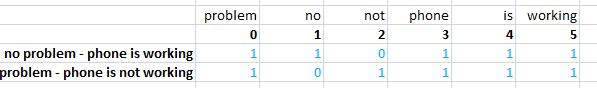